In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
%matplotlib inline

In [46]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


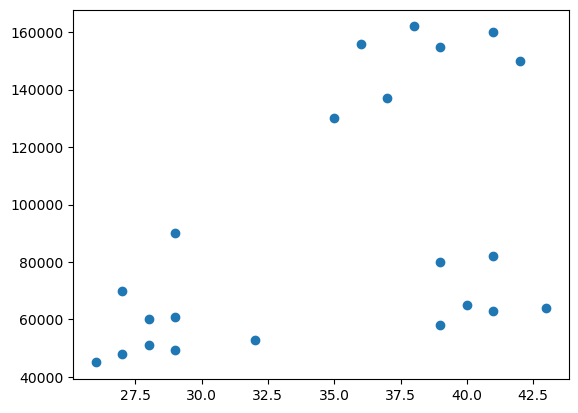

In [47]:
plt.scatter(df['Age'], df['Income($)'])

In [48]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [49]:
y_predicted = km.fit_predict(df.drop("Name", axis=1))
y_predicted

c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [50]:
df['cluster'] = y_predicted

In [51]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


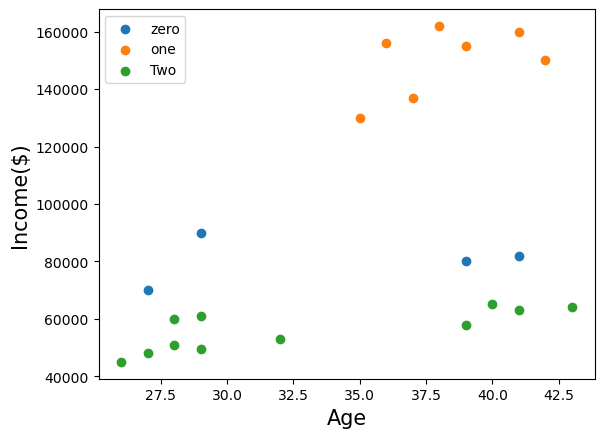

In [52]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
plt.scatter(df0['Age'], df0['Income($)'], label='zero')
plt.scatter(df1['Age'], df1['Income($)'], label='one')
plt.scatter(df2['Age'], df2['Income($)'], label='Two')
plt.xlabel("Age", size=15)
plt.ylabel("Income($)", size=15)
plt.legend()

In [53]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [54]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [67]:
km = KMeans(n_clusters=3)
x = 'Age'
y = "Income($)"
X = df[[x, y]].values
y_predicted = km.fit(X)

c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
df['cluster'] = km.labels_

In [71]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


<Axes: xlabel='Age', ylabel='Income($)'>

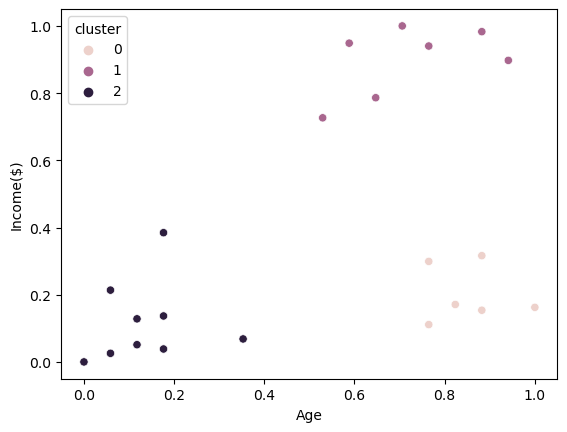

In [72]:
import seaborn as sns
sns.scatterplot(x=x, y=y, data=df, hue='cluster')

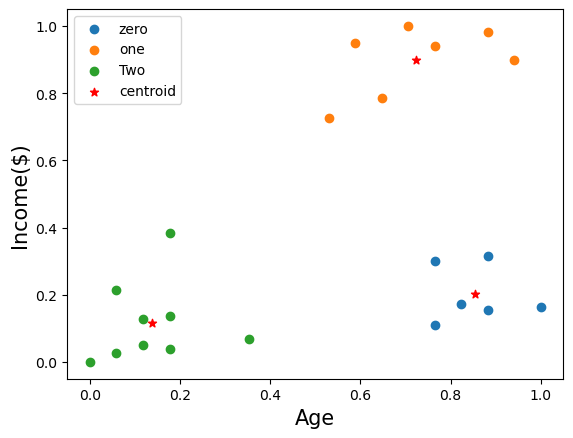

In [74]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
plt.scatter(df0['Age'], df0['Income($)'], label='zero')
plt.scatter(df1['Age'], df1['Income($)'], label='one')
plt.scatter(df2['Age'], df2['Income($)'], label='Two')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker='*', label='centroid', color='red')
plt.xlabel("Age", size=15)
plt.ylabel("Income($)", size=15)
plt.legend()

In [75]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

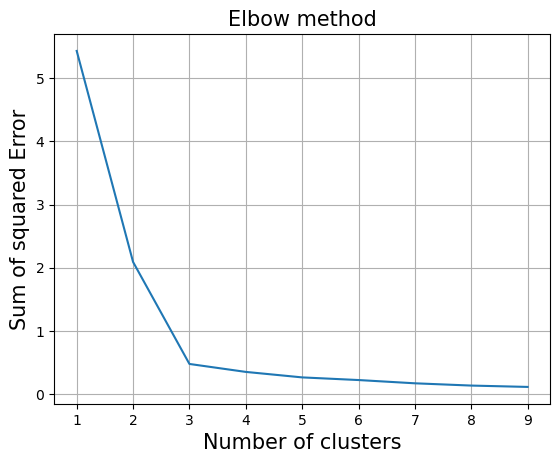

In [79]:
plt.plot(list(range(1, 10)), sse)
plt.title("Elbow method", size=15)
plt.xlabel("Number of clusters", size=15)
plt.ylabel("Sum of squared Error", size=15)
plt.grid()